# Hackathon 2

## 2016 US Campaign Data Review

##### Brief:
Use Classification techniques to establish the relationship between funding of candidates and whether they won or lost.

##### Deliverables:
A well documented and organised jupyter notebook using a Decision Tree model to establish related variables.

##### Success Metrics:
- Precision
- Accuracy
- Sensitivity

********
### Source Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import pydotplus
import scipy as sp

from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.metrics import precision_score

In [2]:
data = pd.read_csv('summary.csv')

In [3]:
data.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,"$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,"$105,687.23","$1,406,719.06","$1,298,831.83",NaN,NaN,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,"$35,645.09","$650,855.38","$656,210.29","$60,000.00",NaN,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,"$83,815.78","$399,122.61","$4,938,943.74","$5,055,942.15",NaN,NaN,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,"$83,690.60","$181,338.23","$1,197,676.61","$949,488.98","$4,401.75",NaN,1/1/2015,10/19/2016,Y,277390.0


*******
### Clean Data

In [4]:
data.columns

Index(['can_id', 'can_nam', 'can_off', 'can_off_sta', 'can_off_dis',
       'can_par_aff', 'can_inc_cha_ope_sea', 'can_str1', 'can_str2', 'can_cit',
       'can_sta', 'can_zip', 'ind_ite_con', 'ind_uni_con', 'ind_con',
       'par_com_con', 'oth_com_con', 'can_con', 'tot_con',
       'tra_fro_oth_aut_com', 'can_loa', 'oth_loa', 'tot_loa',
       'off_to_ope_exp', 'off_to_fun', 'off_to_leg_acc', 'oth_rec', 'tot_rec',
       'ope_exp', 'exe_leg_acc_dis', 'fun_dis', 'tra_to_oth_aut_com',
       'can_loa_rep', 'oth_loa_rep', 'tot_loa_rep', 'ind_ref', 'par_com_ref',
       'oth_com_ref', 'tot_con_ref', 'oth_dis', 'tot_dis',
       'cas_on_han_beg_of_per', 'cas_on_han_clo_of_per', 'net_con',
       'net_ope_exp', 'deb_owe_by_com', 'deb_owe_to_com', 'cov_sta_dat',
       'cov_end_dat', 'winner', 'votes'],
      dtype='object')

In [5]:
data['winner'].value_counts()

Y    471
Name: winner, dtype: int64

In [6]:
#fill empty values
data['winner'].fillna('N', inplace=True)
data['winner'].value_counts()

N    1343
Y     471
Name: winner, dtype: int64

In [7]:
# build dictionary of metadata
tables = pd.read_html("metadata.htm")
zipbObj = zip(tables[0][0],tables[0][1])
colNameDictionary = dict(zipbObj)

In [8]:
# rename columns with full data names
data.rename(columns = colNameDictionary, inplace = True)
data.columns

Index(['Candidate Id', 'Candidate Name', 'Candidate Office',
       'Candidate Office State', 'Candidate Office District',
       'Candidate Party Affiliation',
       'Candidate Incumbent Challenger Open Seat', 'Candidate Street 1',
       'Candidate Street 2', 'Candidate City', 'Candidate State',
       'Candidate Zip', 'Individual Itemized Contribution',
       'Individual Unitemized Contribution', 'Individual Contribution',
       'Party Committee Contribution', 'Other Committee Contribution',
       'Candidate Contribution', 'Total Contribution',
       'Transfer from other Authorized Committee', 'Candidate Loan',
       'Other Loan', 'Total Loan', 'Offsets to Operating Expenditure',
       'Offsets to Fundraising', 'Offsets to Legal Accounting',
       'Other Receipts', 'Total Receipts', 'Operating Expenditure',
       'Exempt Legal Accounting Disbursement', 'Fundraising Disbursement',
       'Transfer to Other Authorized Committee', 'Candidate Loan Repayment',
       'Other Loan

In [9]:
# drop unwanted columns
data.drop(['Candidate Street 1','Candidate Street 2','Candidate Loan','Candidate Loan Repayment','Candidate Loan',
           'Candidate Loan Repayment','Debt Owed by Committee','Debt Owed to Committee',
           'Exempt Legal Accounting Disbursement','Fundraising Disbursement','Individual Itemized Contribution',
           'Individual Refund','Individual Unitemized Contribution','Offsets to Fundraising',
           'Offsets to Legal Accounting','Offsets to Operating Expenditure','Other Committee Contribution',
           'Other Committee Refund','Other Disbursement','Other Loan','Other Loan Repayment','Other Receipts',
           'Party Committee Contribution','Party Committee Refund','Transfer from other Authorized Committee',
           'Transfer to Other Authorized Committee'], axis=1, inplace=True)

In [10]:
# drop all $-signs and commas, replace values in columns with negative numbers and convert all below columns to floats
data.replace({'\$': '', ',': '', '\(':'-', '\)':''}, regex=True, inplace = True)

cols = ['Individual Contribution', 'Candidate Contribution',
       'Total Contribution', 'Total Loan', 'Total Receipts',
       'Operating Expenditure', 'Total Loan Repayment',
       'Total Contribution Refund', 'Total Disbursement',
       'Cash on Hand Beginning of Period', 'Cash on Hand Close of Period',
       'Net Contribution', 'Net Operating Expenditure']

for i in cols:
    data[i] = data[i].astype(float)

In [11]:
#replace all empty values with zero
data.fillna(0, inplace=True)

In [12]:
data.head(1)

,Candidate Id,Candidate Name,Candidate Office,Candidate Office State,Candidate Office District,Candidate Party Affiliation,Candidate Incumbent Challenger Open Seat,Candidate City,Candidate State,Candidate Zip,...,Total Contribution Refund,Total Disbursement,Cash on Hand Beginning of Period,Cash on Hand Close of Period,Net Contribution,Net Operating Expenditure,Coverage Start Date,Coverage End Date,winner,votes
0,H2GA12121,ALLEN RICHARD W,H,GA,12.0,REP,INCUMBENT,AUGUSTA,GA,30904.0,...,0.0,978518.98,60109.57,175613.35,1074949.5,907156.21,1/1/2015,10/19/2016,Y,158708.0


#### Datasets
Create unique datasets based on the following, which will allow various analysis to be carried out, determining whether the variables have a true or only apparent affect.

For instance, spending by presidential candidates will be larger than that for House candidates, so analysing this as a whole may give skewed results.

- Candidates Office: House, Senate, President
- Candidates Party: Republic, Democrats
- Winners: Yes or No

In [13]:
CanH = data[(data['Candidate Office'] == 'H')]
CanS = data[(data['Candidate Office'] == 'S')]
CanP = data[(data['Candidate Office'] == 'P')]

NotP = data[(data['Candidate Office'] != 'P')]

In [14]:
REP = data[(data['Candidate Party Affiliation'] == 'REP')]
DEM = data[(data['Candidate Party Affiliation'] == 'DEM')]

In [15]:
WIN = data[(data['winner'] == 'Y')]
LOSS = data[(data['winner'] == 'N')]

********
### Explore Data - Review of CanH data

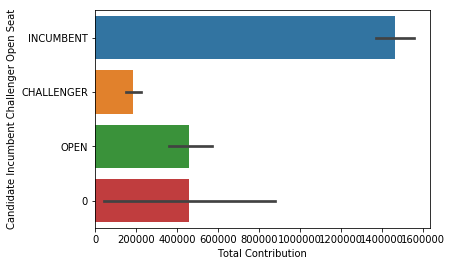

In [16]:
sns.barplot(x ='Total Contribution', y='Candidate Incumbent Challenger Open Seat', data=CanH)

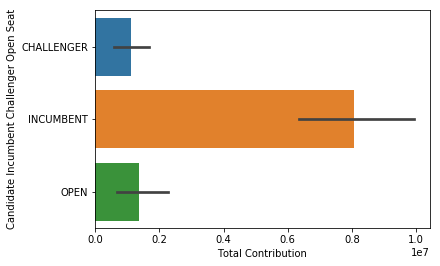

In [17]:
sns.barplot(x ='Total Contribution', y='Candidate Incumbent Challenger Open Seat', data=CanS)

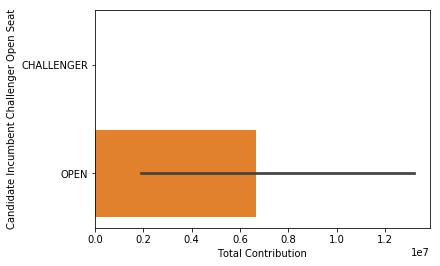

In [18]:
sns.barplot(x ='Total Contribution', y='Candidate Incumbent Challenger Open Seat', data=CanP)

### Transform Data

In [19]:
feature_cols = ['Candidate Office State',
                'Candidate Party Affiliation',
                'Candidate Incumbent Challenger Open Seat',
                'Operating Expenditure']
#'Individual Contribution','Candidate Contribution','Total Loan',
X = CanH[feature_cols]
y = CanH.winner

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 1813
Data columns (total 4 columns):
Candidate Office State                      1429 non-null object
Candidate Party Affiliation                 1429 non-null object
Candidate Incumbent Challenger Open Seat    1429 non-null object
Operating Expenditure                       1429 non-null float64
dtypes: float64(1), object(3)
memory usage: 95.8+ KB


In [21]:
X = pd.get_dummies(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123)

In [23]:
X_train.head()

,Operating Expenditure,Candidate Office State_AK,Candidate Office State_AL,Candidate Office State_AR,Candidate Office State_AS,Candidate Office State_AZ,Candidate Office State_CA,Candidate Office State_CO,Candidate Office State_CT,Candidate Office State_DC,...,Candidate Party Affiliation_OTH,Candidate Party Affiliation_PPT,Candidate Party Affiliation_REP,Candidate Party Affiliation_UN,Candidate Party Affiliation_UNK,Candidate Party Affiliation_W,Candidate Incumbent Challenger Open Seat_0,Candidate Incumbent Challenger Open Seat_CHALLENGER,Candidate Incumbent Challenger Open Seat_INCUMBENT,Candidate Incumbent Challenger Open Seat_OPEN
416,41632.30,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
691,114925.19,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
297,2462492.16,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
204,837932.25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
332,1304761.06,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [24]:
clf  =  tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
y_predict = clf.predict(X_test)

In [27]:
print('Accuracy:', metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.9534883720930233


In [28]:
precision_score(y_test, y_predict, average=None) 

array([0.95394737, 0.95238095])

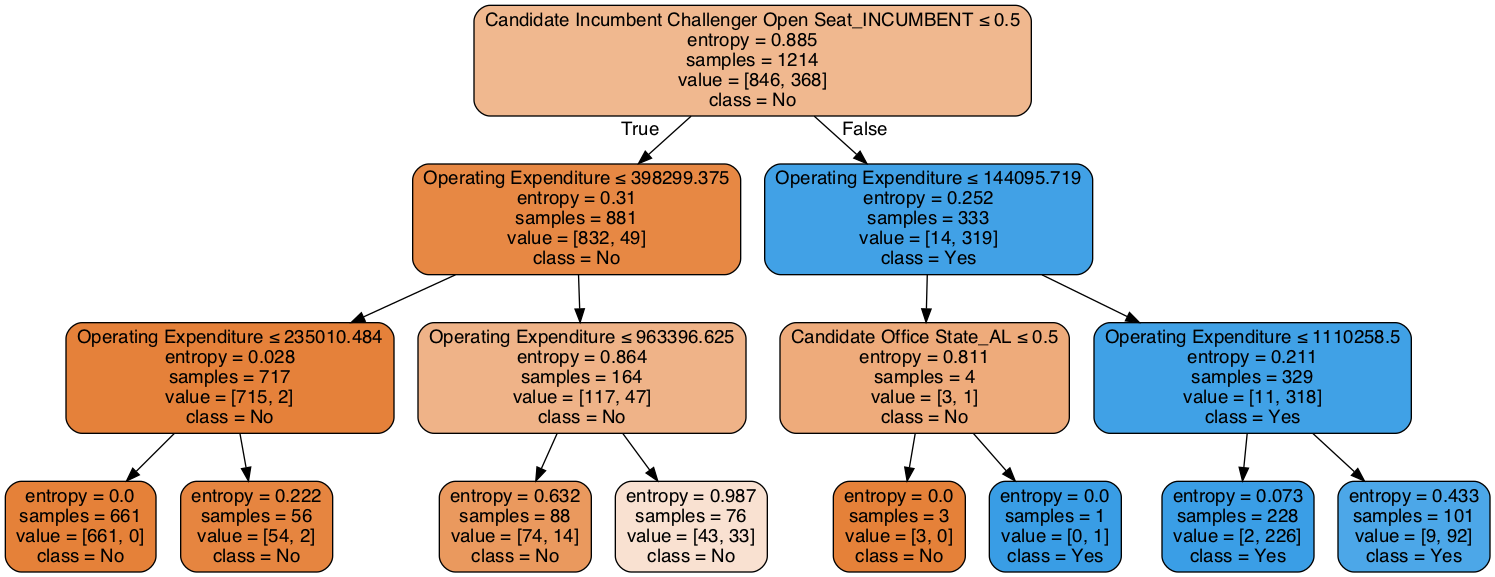

In [31]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True, special_characters=True, 
                feature_names=X_train.columns, class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())